In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Activation, MaxPooling2D, Conv2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd

In [4]:
BATCH_SIZE = 32
IMG_SIZE = (224,224)

train_data =tf.keras.preprocessing.image_dataset_from_directory("train/train",
                                                          shuffle = True,
                                                          image_size=IMG_SIZE,
                                                          batch_size=BATCH_SIZE)

Found 25000 files belonging to 2 classes.


In [5]:
# Check out the class names of our dataset
train_data.class_names

['cats', 'dogs']

In [6]:
Train = train_data.prefetch(buffer_size=tf.data.AUTOTUNE)

In [7]:
base_model = tf.keras.applications.EfficientNetB0(include_top=False)

base_model.trainable = False

inputs = tf.keras.layers.Input(shape=(224, 224, 3), name='InputLayer')

x = base_model(inputs)

x = tf.keras.layers.GlobalAveragePooling2D(name="GlobalAveragePoolingLayer")(x)

outputs = tf.keras.layers.Dense(10, activation='softmax', name="OutputLayer")(x)

model_0 = tf.keras.Model(inputs, outputs, name='ImageClassifierModel')

model_0.compile(loss='sparse_categorical_crossentropy',
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

history_0 = model_0.fit(Train,
                        epochs=5,
                        validation_data=Train,
                        validation_steps=(0.25 * len(Train)))

Epoch 1/5


2023-05-03 18:39:28.418210: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


782/782 [==============================] - 147s 184ms/step - loss: 0.0795 - accuracy: 0.9822 - val_loss: 0.0237 - val_accuracy: 0.9927
Epoch 2/5
782/782 [==============================] - 148s 189ms/step - loss: 0.0313 - accuracy: 0.9895 - val_loss: 0.0191 - val_accuracy: 0.9939
Epoch 3/5
782/782 [==============================] - 163s 209ms/step - loss: 0.0259 - accuracy: 0.9911 - val_loss: 0.0165 - val_accuracy: 0.9949
Epoch 4/5
782/782 [==============================] - 171s 219ms/step - loss: 0.0224 - accuracy: 0.9925 - val_loss: 0.0139 - val_accuracy: 0.9962
Epoch 5/5
782/782 [==============================] - 169s 216ms/step - loss: 0.0223 - accuracy: 0.9920 - val_loss: 0.0141 - val_accuracy: 0.9951


In [8]:
model_0.summary()

Model: "ImageClassifierModel"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 InputLayer (InputLayer)     [(None, 224, 224, 3)]     0         
                                                                 
 efficientnetb0 (Functional)  (None, None, None, 1280)  4049571  
                                                                 
 GlobalAveragePoolingLayer (  (None, 1280)             0         
 GlobalAveragePooling2D)                                         
                                                                 
 OutputLayer (Dense)         (None, 10)                12810     
                                                                 
Total params: 4,062,381
Trainable params: 12,810
Non-trainable params: 4,049,571
_________________________________________________________________


In [9]:
from tensorflow.keras.utils import plot_model

plot_model(model_0, show_shapes=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


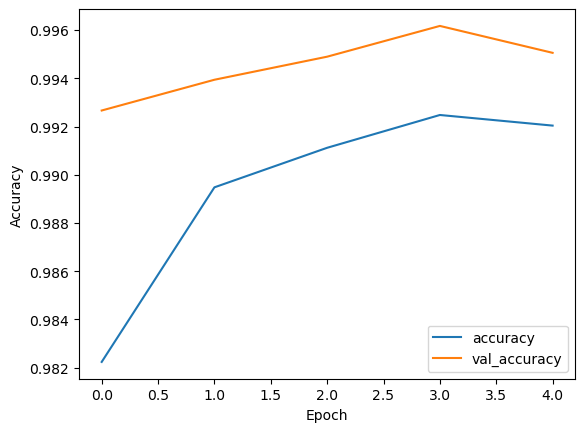

In [10]:
plt.plot(history_0.history['accuracy'], label='accuracy')
plt.plot(history_0.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right');

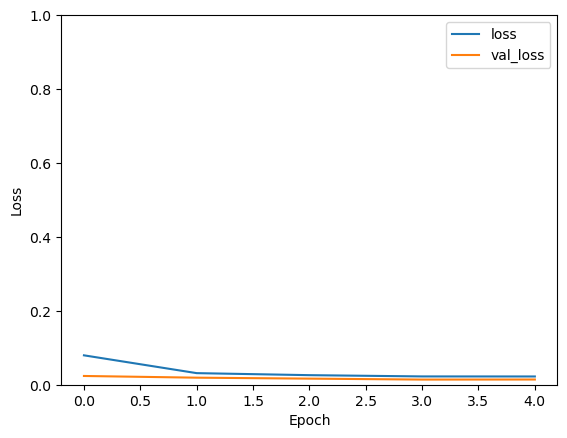

In [11]:
plt.plot(history_0.history['loss'], label='loss')
plt.plot(history_0.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.ylim([0.0, 1])
plt.legend(loc='upper right');

Image to predict 
actual label:  dogs
1/1 [==============================] - 0s 237ms/step
predicted batch:  dogs


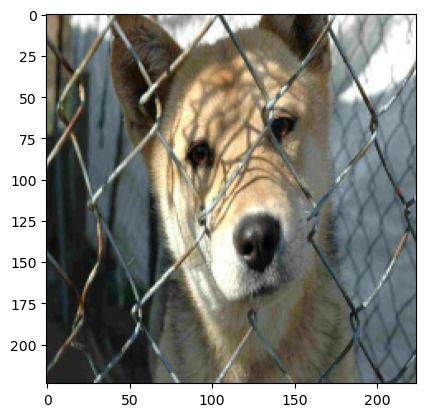

In [20]:
for img_batch, labels_batch in Train.take(1):
    
    first_img = img_batch[0].numpy().astype('uint8')
    first_label = labels_batch[0].numpy()
    
    print('Image to predict ')
    plt.imshow(first_img)
    print('actual label: ',train_data.class_names[first_label])
    
    batch_prediction = model_0.predict(img_batch)
    print('predicted batch: ',train_data.class_names[np.argmax(batch_prediction[0])])

In [21]:
test_filenames = os.listdir("test/test")
test_df = pd.DataFrame({
    'id': test_filenames
})

In [22]:
test_datagen = ImageDataGenerator()

test_generator = test_datagen.flow_from_dataframe(
    test_df,
    "test/test",
    x_col='id',
    y_col=None,
    class_mode=None,
    target_size=IMG_SIZE,
    batch_size=BATCH_SIZE,
    shuffle=False
)

Found 8000 validated image filenames.


/Users/joyrattoo/anaconda3/envs/tensorflow/lib/python3.10/site-packages/keras/preprocessing/image.py:1137: UserWarning: Found 1 invalid image filename(s) in x_col="id". These filename(s) will be ignored.
  warnings.warn(


In [24]:
predict = model_0.predict(test_generator)
test_df['labels'] = np.argmax(predict, axis=-1)
print(test_df)
test_df.set_index('id')
test_df.to_csv('submission.csv',index=False)

250/250 [==============================] - 35s 139ms/step


ValueError: Length of values (8000) does not match length of index (8001)